<a href="https://colab.research.google.com/github/YasinnSoylu/Stokastik_Osilator/blob/main/Finansal_Analiz_i%C3%A7in_Stokastik_Osilat%C3%B6r_ile_Al%C4%B1m_Sat%C4%B1m_Sinyalleri_Olu%C5%9Fturma_ve_Sim%C3%BClasyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Oscillator

The Stochastic Oscillator is a technical indicator used to identify overbought and oversold points in financial markets. It was first developed by George Lane in the 1950s and has since become a popular indicator among traders.

The Stochastic Oscillator works by measuring the momentum and speed of price movements. This is calculated by assuming that prices move within a certain range over a specific time period.

The calculation of the Stochastic Oscillator consists of two basic components: %K and %D.

%K is derived from the highest and lowest price range within a specified time frame relative to the closing price. This calculation is done using the following formula:

%K = (Current price - Lowest low) / (Highest high - Lowest low) x 100

Here, "Highest high" and "Lowest low" refer to the highest and lowest prices within a specific time frame.

The %K value is typically plotted as a line graph and usually ranges between 0 and 100. %K is generally used to calculate %D.

%D is the moving average of %K and is plotted as a smoother line graph. The calculation of %D is done by taking the moving average of the previous few %K values.

The Stochastic Oscillator is typically plotted as a graph and oscillates between overbought and oversold zones defined by a horizontal line. The crossing of %K and %D is often interpreted as a buying or selling signal.

The overbought zone is typically a region where %K reaches 80 or higher. This indicates that prices have risen excessively in a short period of time, and there may be a corrective movement to lower prices.

The oversold zone is typically a region where %K reaches 20 or lower. This indicates that prices have fallen excessively in a short period of time, and there may be potential for prices to rise.

The Stochastic Oscillator is often used in conjunction with other technical indicators.

In [40]:
pip install  mplfinance


In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import plotly.graph_objs as go
import mplfinance as mpf

In [53]:
symbol = "AAPL"
start_date = "2022-06-01"
end_date = "2023-06-01"
data = yf.download(symbol, start=start_date, end=end_date,interval="1h")

[*********************100%***********************]  1 of 1 completed


In [54]:
# Draw candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show()

In [55]:
# Calculate stochastic oscillator
n = 14

# Calculate the highest prices over the last n periods
high = data['High'].rolling(n).max()

# Calculate the lowest prices over the last n periods
low = data['Low'].rolling(n).min()

# Calculate the Stochastic Oscillator
# The formula is: 100 * (close - low) / (high - low)
k = 100 * (data['Close'] - low) / (high - low)

# Calculate the simple moving average of k over the last 3 periods
d = k.rolling(3).mean()


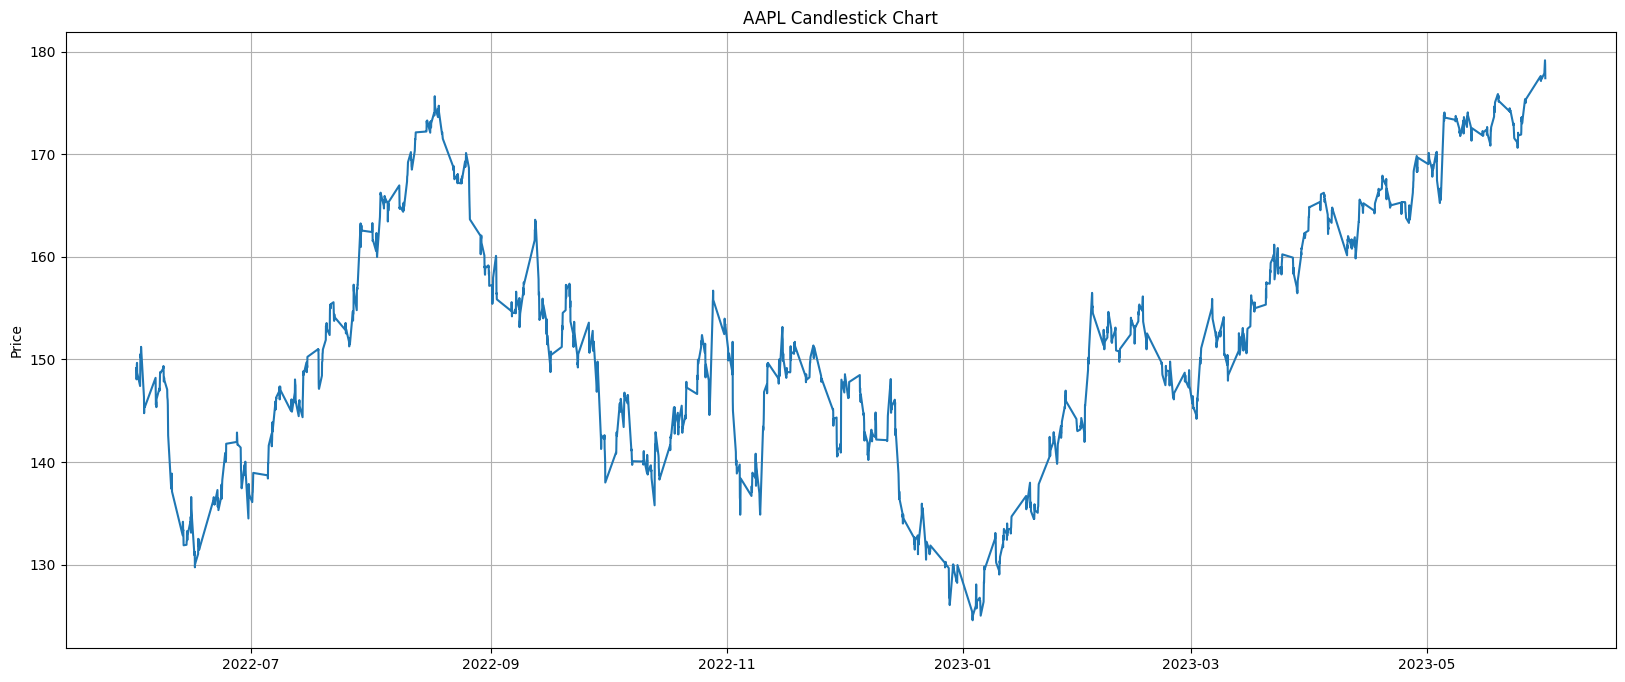

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



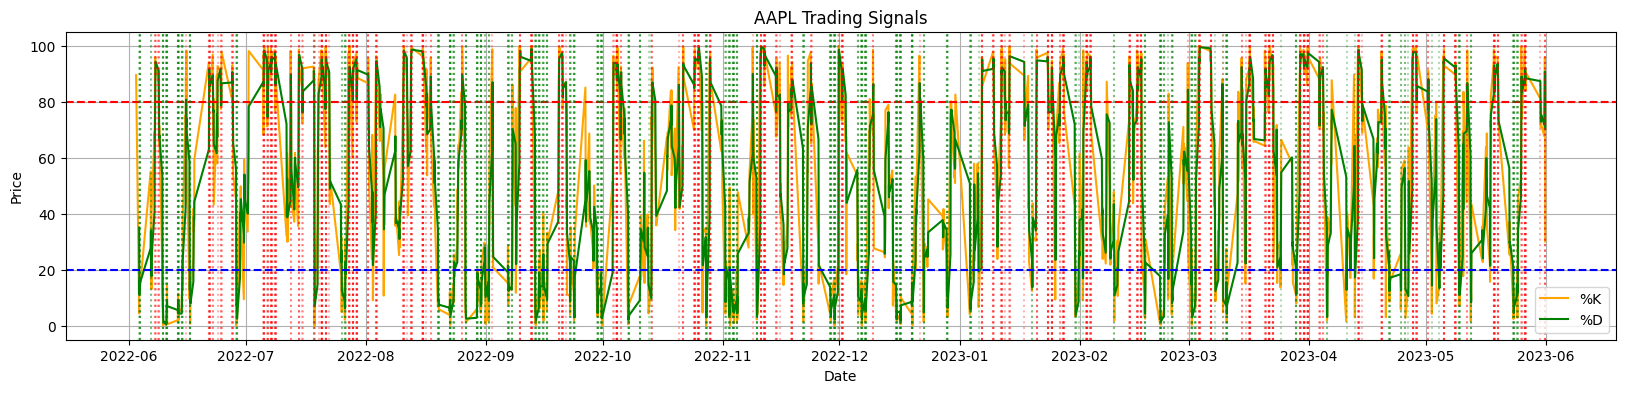

In [56]:
fig1, ax1 = plt.subplots(figsize=(20, 8))
fig2, ax2 = plt.subplots(figsize=(20, 4))

# Plot the candlestick chart in the first subplot
ax1.plot(data.index, data['Close'], label='Kapanış Fiyatı')
ax1.set_title(f"{symbol} Candlestick Chart")
ax1.set_ylabel("Price")

# Plot the closing price and %K/%D lines in the second subplot
ax2.plot(data.index, k, label='%K', color='orange')
ax2.plot(data.index, d, label='%D', color='green')
ax2.set_title(f"{symbol} Trading Signals")
ax2.set_xlabel("Date")
ax2.set_ylabel("Price")
ax2.legend()

# Add horizontal lines at overbought and oversold levels (default: 80 and 20)
ax2.axhline(y=80, color='red', linestyle='--', label='Overbought')
ax2.axhline(y=20, color='blue', linestyle='--', label='Oversold')

# Add vertical lines for buy and sell signals
for i in range(len(data)):
    if (k[i] < 20) & (d[i] < 20): # Buy signal
        ax2.axvline(x=data.index[i], color='green', linestyle='dotted',alpha=0.3)
    elif (k[i] > 80) & (d[i] > 80): # Sell signal
        ax2.axvline(x=data.index[i], color='red', linestyle='dotted',alpha=0.3)

# Customize x-axis tick labels to show only year and month
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add grid lines
ax1.grid()
ax2.grid()

# Show the plot
plt.show()



In [57]:
buy_signal = (k > d) & (k.shift(1) < d.shift(1))
sell_signal = (k < d) & (k.shift(1) > d.shift(1))

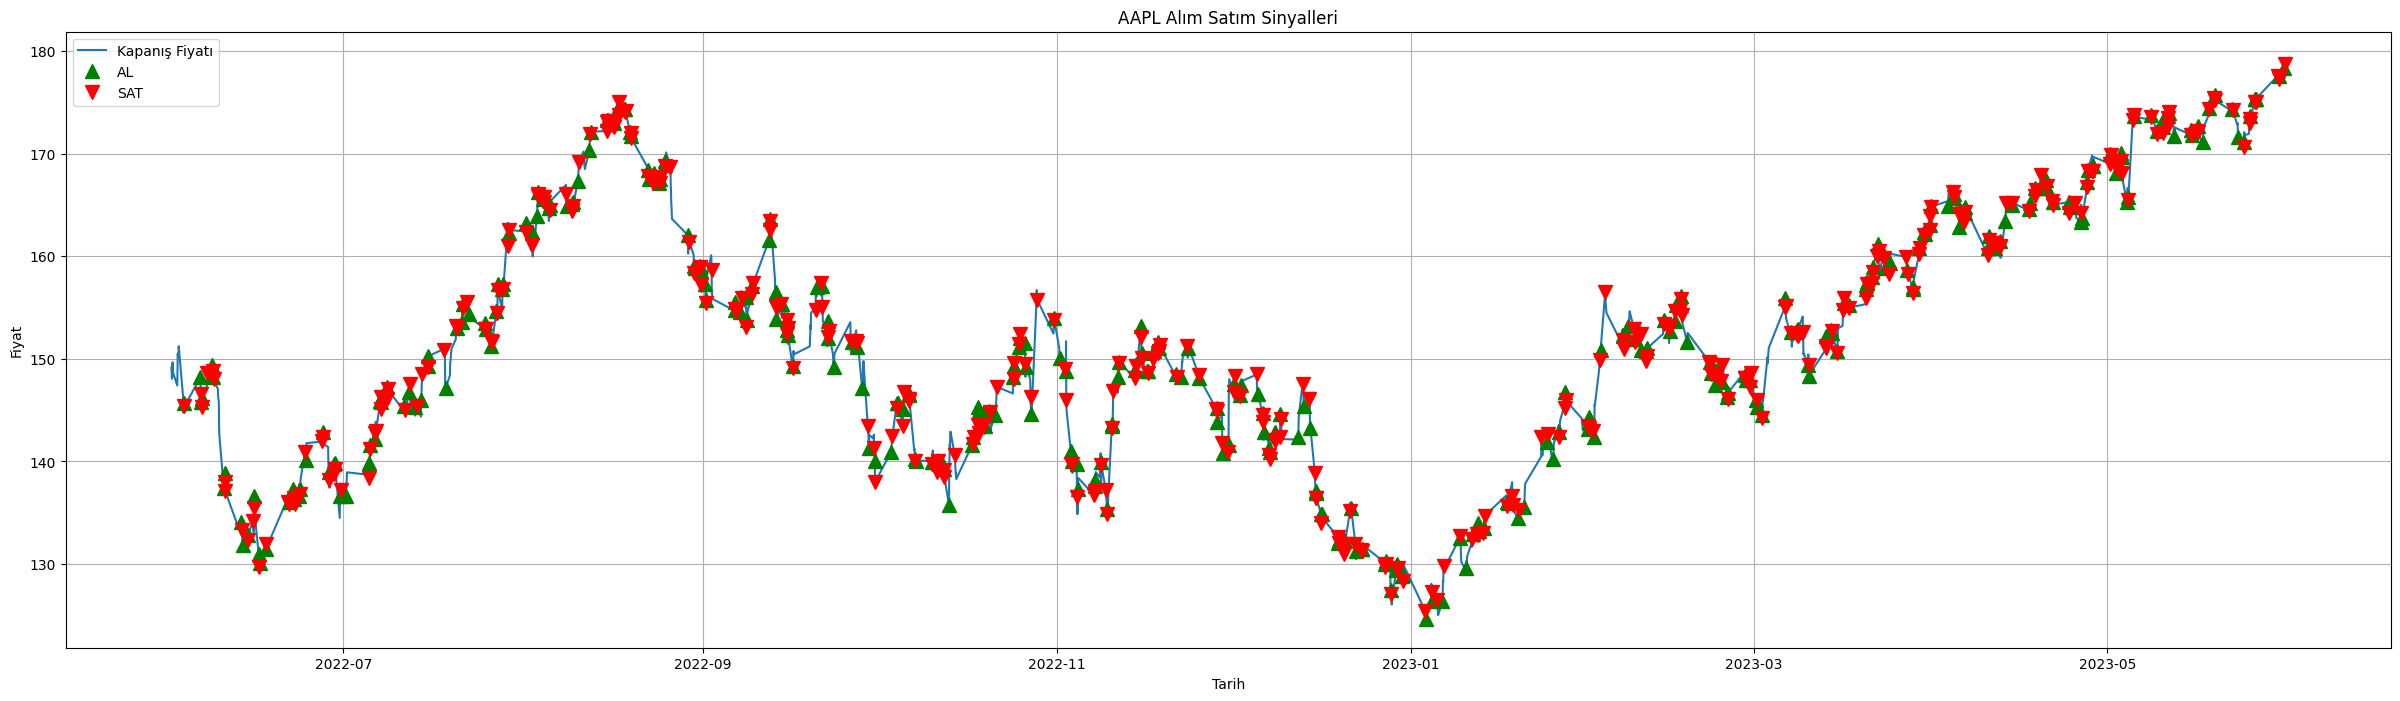

In [58]:
plt.figure(figsize=(30,8))
plt.plot(data.index, data['Close'], label='Kapanış Fiyatı')

plt.plot(data.loc[buy_signal].index, data.loc[buy_signal]['Close'], '^', markersize=10, color='green', label='AL')
plt.plot(data.loc[sell_signal].index, data.loc[sell_signal]['Close'], 'v', markersize=10, color='red', label='SAT')
plt.legend()
plt.title(f"{symbol} Alım Satım Sinyalleri")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid()
plt.show()


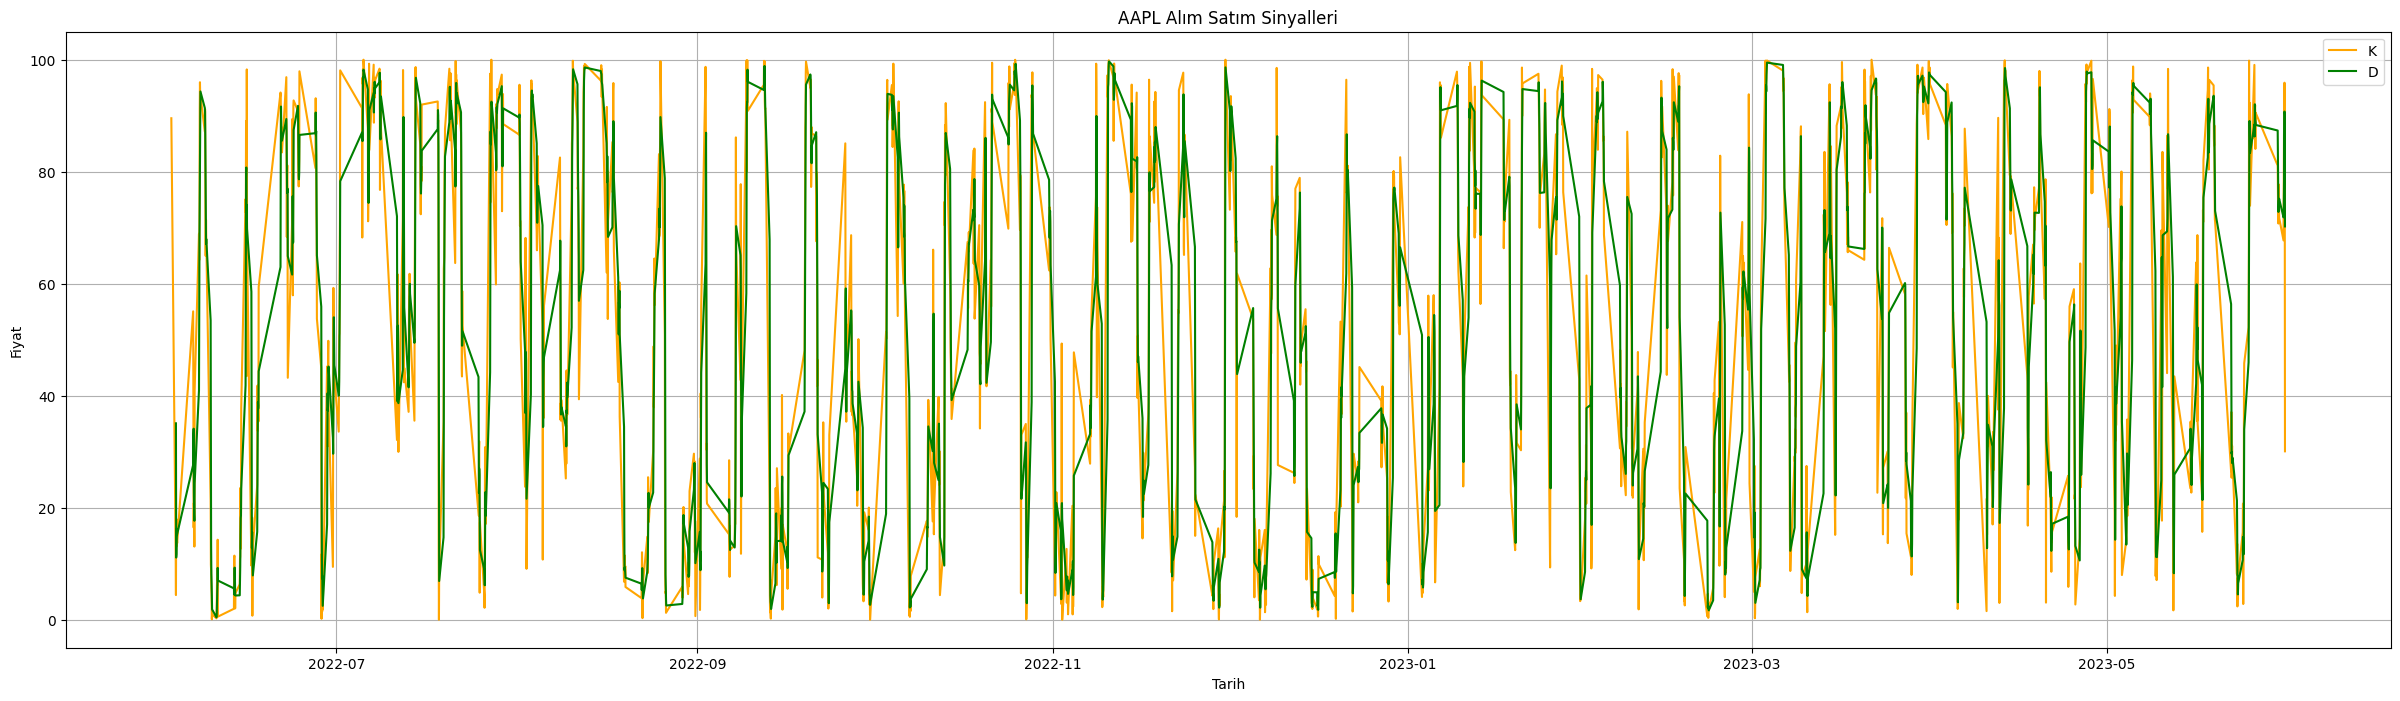

In [60]:
plt.figure(figsize=(30,8))
plt.plot(data.index, k, label='K', color='orange')
plt.plot(data.index, d, label='D', color='green')
plt.legend()
plt.title(f"{symbol} Alım Satım Sinyalleri")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid()
plt.show()

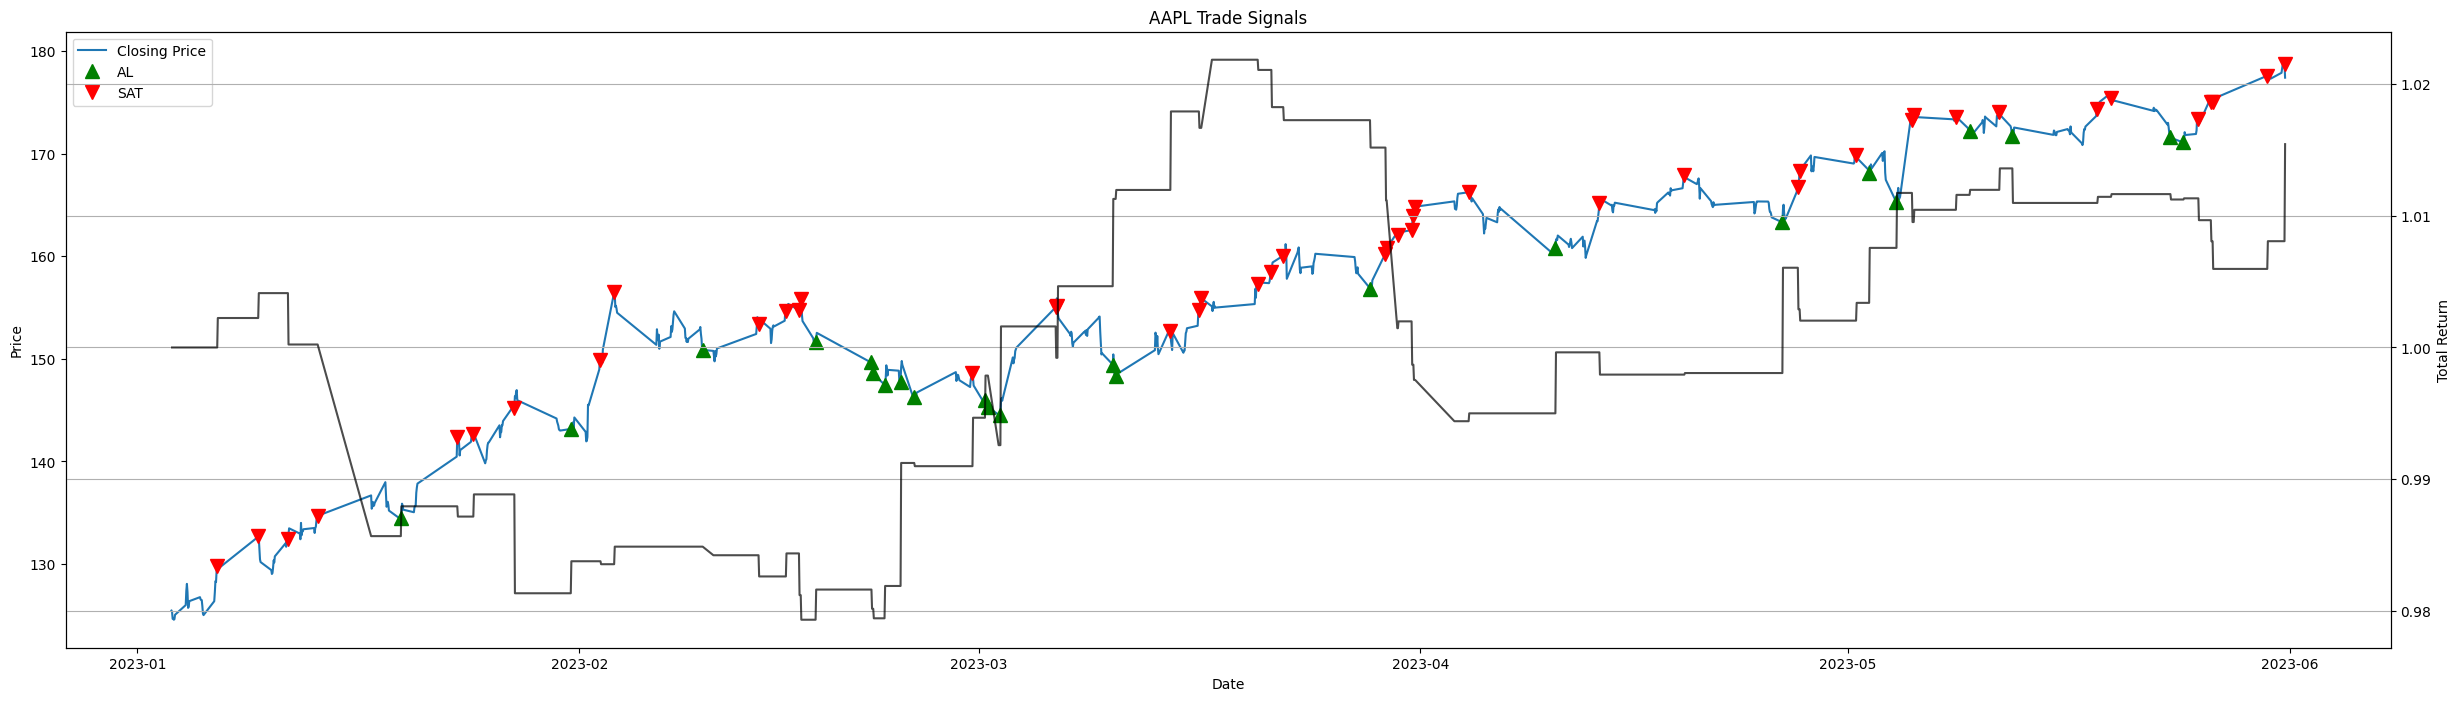

In [48]:
# Set trading signals
buy_signal = (k > d) & (k.shift(1) < d.shift(1)) & (k < 20)
sell_signal = (k < d) & (k.shift(1) > d.shift(1)) & (k > 80)

# Plot the buy and sell signals on the chart
fig, ax = plt.subplots(figsize=(30, 8))
ax.plot(data.index, data['Close'], label='Closing Price')
ax.plot(data.loc[buy_signal].index, data.loc[buy_signal]['Close'], '^', markersize=10, color='green', label='AL')
ax.plot(data.loc[sell_signal].index, data.loc[sell_signal]['Close'], 'v', markersize=10, color='red', label='SAT')
ax.legend()
ax.set_title(f"{symbol} Trade Signals")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# Calculate rate of return
returns = np.log(data['Close']/data['Close'].shift(1))
strategy_returns = returns * (buy_signal.astype(int) - sell_signal.astype(int)).shift(1)
total_returns = strategy_returns.cumsum().apply(np.exp)
ax2 = ax.twinx()
ax2.plot(total_returns.index, total_returns, color='black', alpha=0.7)
ax2.set_ylabel('Total Return')
plt.grid()

plt.show()



# 5 day period


In [49]:
symbol = "AAPL"
start_date = "2021-01-01"
end_date = "2023-06-01"


data = yf.download(symbol, start=start_date, end=end_date, interval="5d")
# Calculate stochastic oscillator
n = 14

# Calculate the highest prices over the last n periods
high = data['High'].rolling(n).max()

# Calculate the lowest prices over the last n periods
low = data['Low'].rolling(n).min()

# Calculate the Stochastic Oscillator
# The formula is: 100 * (close - low) / (high - low)
k = 100 * (data['Close'] - low) / (high - low)

# Calculate the simple moving average of k over the last 3 periods
d = k.rolling(3).mean()

# Alım satım sinyallerini belirle
buy_signal = (k > d) & (k.shift(1) < d.shift(1))
sell_signal = (k < d) & (k.shift(1) > d.shift(1))

# Sinyalleri birleştir ve işlem yapılacak tarihleri belirle
signals = pd.concat([buy_signal.rename('Buy'), sell_signal.rename('Sell')], axis=1)
trade_dates = signals.index[signals['Buy'] | signals['Sell']]

# Hisse senedi fiyatlarını sadece işlem yapılacak tarihler için seç
trade_data = data.loc[trade_dates]

# Alım satım işlemlerini yap
position = 0
positions = []
for date, signal in signals.iterrows():
    if signal['Buy']:
        position = 1
    elif signal['Sell']:
        position = -1
    else:
        position = 0
    positions.append(position)

# Pozisyonları birleştir ve işlem yapılacak tarihleri belirle
positions = pd.Series(positions, index=signals.index)
trade_dates = positions.index[positions != 0]

# Hisse senedi fiyatlarını sadece işlem yapılacak tarihler için seç
trade_data = data.loc[trade_dates]

# Alım satım işlemlerini simüle et
capital = 10000  # Başlangıç sermayesi
shares = 0  # Başlangıç hisse adedi
trades = []
for date, price in trade_data['Close'].items():
    position = positions.loc[date]
    if position == 1:
        shares_to_buy = capital // price
        shares += shares_to_buy
        capital -= shares_to_buy * price
        trades.append(('Buy', date, price, shares_to_buy))
    elif position == -1:
        capital += shares * price
        trades.append(('Sell', date, price, shares))
        shares = 0

# Son pozisyonu kapat
if shares > 0:
    capital += shares * data.loc[data.index[-1], 'Close']
    trades.append(('Sell', data.index[-1], data.loc[data.index[-1], 'Close'], shares))



[*********************100%***********************]  1 of 1 completed


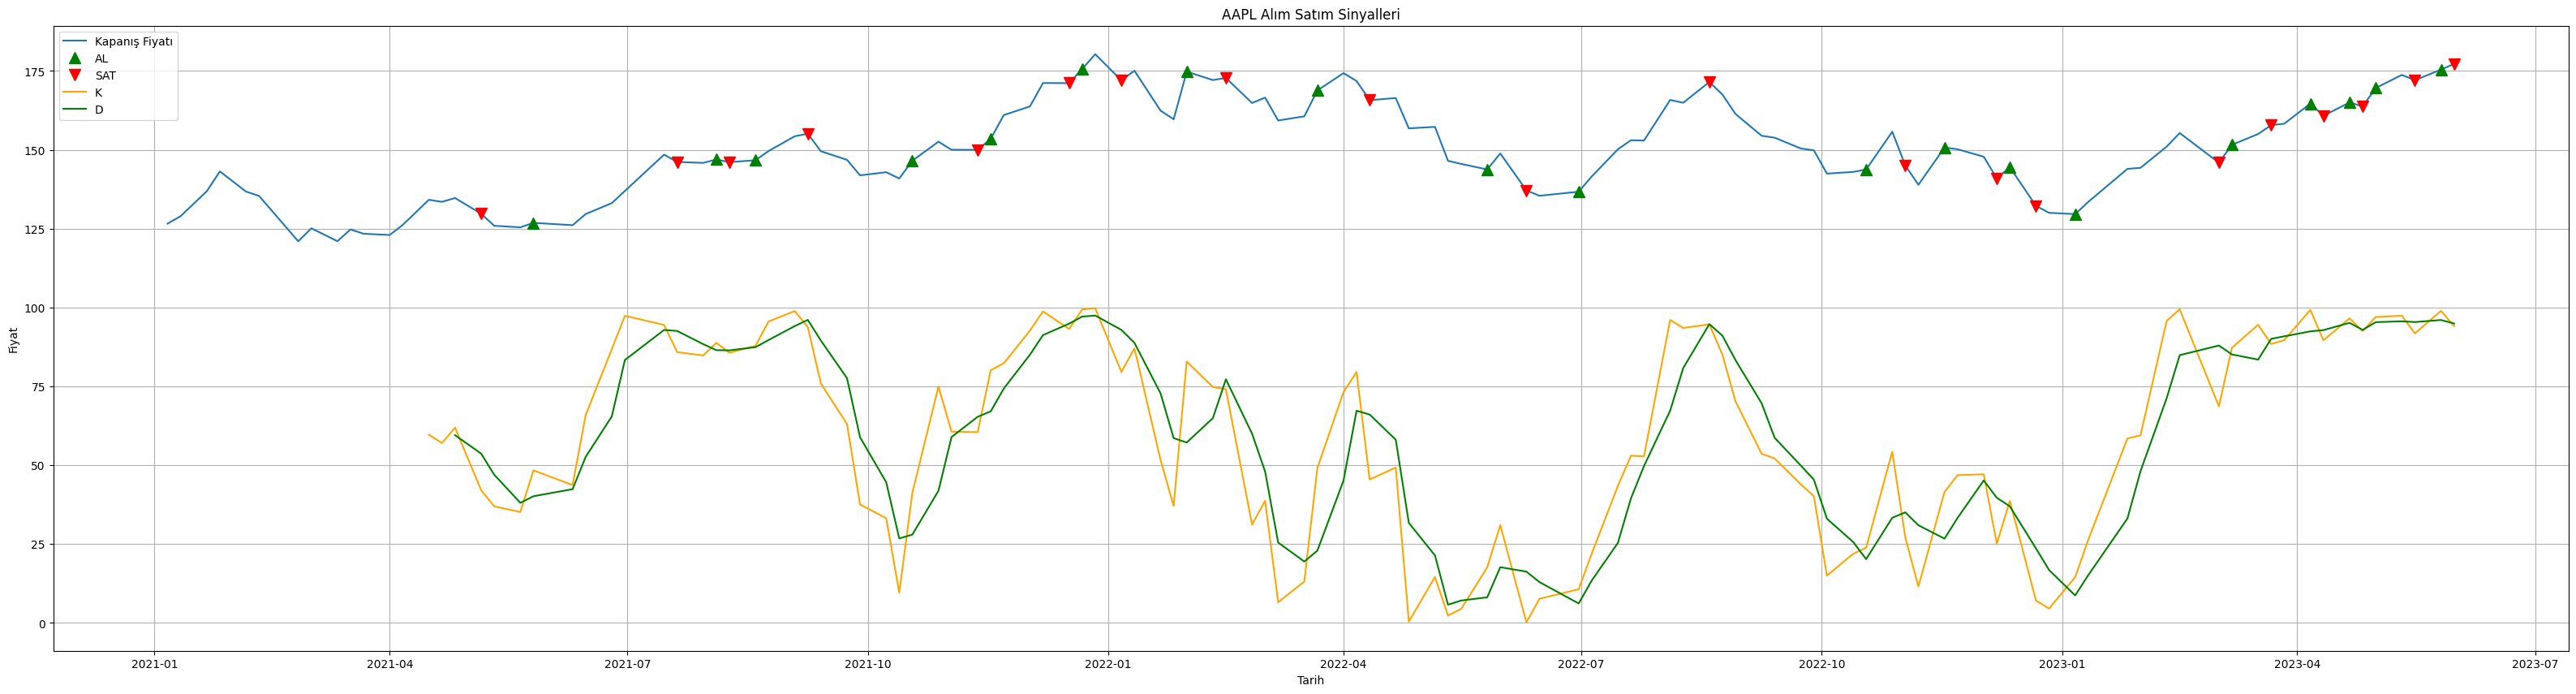

In [50]:
plt.figure(figsize=(40,10))
plt.plot(data.index, data['Close'], label='Kapanış Fiyatı')
plt.plot(data.loc[buy_signal].index, data.loc[buy_signal]['Close'], '^', markersize=10, color='green', label='AL')
plt.plot(data.loc[sell_signal].index, data.loc[sell_signal]['Close'], 'v', markersize=10, color='red', label='SAT')
plt.plot(data.index, k, label='K', color='orange')
plt.plot(data.index, d, label='D', color='green')
plt.legend()
plt.title(f"{symbol} Alım Satım Sinyalleri")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid()

plt.show()

In [51]:
# Toplam kar ve zararı hesapla
total_profit_loss = 0
for trade in trades:
    if trade[2] == 'buy':
        total_profit_loss -= trade[1]
    elif trade[2] == 'sell':
        total_profit_loss += trade[1]
total_profit_loss += capital - 10000

# Yüzde kaç kar veya zarar edildiğini hesapla
pct_profit_loss = (total_profit_loss / 10000) * 100

# Sonuçları yazdır
print(f"Başlangıç sermayesi: $10000")
print(f"Toplam kar/zarar: ${total_profit_loss:.2f}")
print(f"Yüzde kar/zarar: {pct_profit_loss:.2f}%")


Başlangıç sermayesi: $10000
Toplam kar/zarar: $5745.32
Yüzde kar/zarar: 57.45%
